In [176]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

print(tf.__version__)


2.7.0


In [177]:
datasetfilename = 'saseendataset.npz'

with np.load(datasetfilename, allow_pickle=True) as data:
    dataImages = data['images']
    dataLabel = data['labels']
    dataLabelNames = data['labelnames']
    
print(dataImages.shape)
print(dataLabel.shape)
print(dataLabelNames.shape)

(24,)
(24,)
(24,)


In [178]:
dataImages.dtype, dataLabel.dtype, dataLabelNames.dtype

(dtype('O'), dtype('int32'), dtype('<U10'))

In [179]:
print(dataLabel)
print(dataLabelNames)

[5 0 1 2 3 4 6 7 8 0 1 3 4 6 7 5 0 1 2 3 4 6 7 8]
['JC' 'afiq' 'azureen' 'gavin' 'goke' 'inamul' 'mahmuda' 'numan'
 'saseendran' 'afiq' 'azureen' 'goke' 'inamul' 'mahmuda' 'numan' 'JC'
 'afiq' 'azureen' 'gavin' 'goke' 'inamul' 'mahmuda' 'numan' 'saseendran']


In [180]:
classNames = sorted(np.unique(dataLabelNames))
classLabels = sorted(np.unique(dataLabel))
print(classNames)
print(dataLabel)

['JC', 'afiq', 'azureen', 'gavin', 'goke', 'inamul', 'mahmuda', 'numan', 'saseendran']
[5 0 1 2 3 4 6 7 8 0 1 3 4 6 7 5 0 1 2 3 4 6 7 8]


In [181]:
import cv2 as cv

N = len(dataImages)
shape = (N, 200,200,3)

y = np.empty(shape, dtype='uint8')

for i in range(N):
    y[i] = cv.resize(dataImages[i], [200,200], interpolation=cv.INTER_NEAREST)
    
dataImages.dtype, y.dtype, y.shape

dataImages = y

In [182]:
# Split the data to train and test
trainImages, testImages, trainLabels, testLabels = train_test_split(dataImages, dataLabel, test_size=0.3, random_state=50)

print(dataImages.shape)
print(dataLabel)

print(trainImages.shape)
print(testImages.shape)
print(testLabels)

(24, 200, 200, 3)
[5 0 1 2 3 4 6 7 8 0 1 3 4 6 7 5 0 1 2 3 4 6 7 8]
(16, 200, 200, 3)
(8, 200, 200, 3)
[3 7 4 6 0 8 2 7]


In [183]:
classNames = sorted(np.unique(dataLabelNames))
dataLabel[0]

5

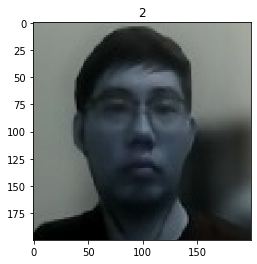

In [184]:
plt.figure()

i = 0
plt.imshow(trainImages[i])
plt.title(f'{trainLabels[i]}')
# plt.xlabel(classNames[dataLabel[i]])
plt.show()

In [185]:
import numpy as np

print(trainImages[0].shape)
print(trainImages[1].shape)

(200, 200, 3)
(200, 200, 3)


In [186]:
for i in range(len(trainImages)):
    trainImages[i] = cv.resize(trainImages[i], [200,200], interpolation=cv.INTER_NEAREST)


In [187]:
inputShape = trainImages[0].shape
outputShape = len(classNames)

inputShape, outputShape

((200, 200, 3), 9)

In [188]:
trainImages = trainImages / 255
testImages = testImages / 255

In [189]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=inputShape),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(outputShape)
])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 120000)            0         
                                                                 
 dense_36 (Dense)            (None, 128)               15360128  
                                                                 
 dense_37 (Dense)            (None, 128)               16512     
                                                                 
 dense_38 (Dense)            (None, 128)               16512     
                                                                 
 dense_39 (Dense)            (None, 9)                 1161      
                                                                 
Total params: 15,394,313
Trainable params: 15,394,313
Non-trainable params: 0
_________________________________________________________________


In [190]:
model.compile(optimizer='adam', loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [196]:
model.fit(trainImages, trainLabels, epochs=25)

Epoch 1/25
1/1 [==============================] - 0s 79ms/step - loss: 0.0456 - accuracy: 1.0000
Epoch 2/25
1/1 [==============================] - 0s 71ms/step - loss: 0.0071 - accuracy: 1.0000
Epoch 3/25
1/1 [==============================] - 0s 86ms/step - loss: 0.0065 - accuracy: 1.0000
Epoch 4/25
1/1 [==============================] - 0s 78ms/step - loss: 0.0128 - accuracy: 1.0000
Epoch 5/25
1/1 [==============================] - 0s 75ms/step - loss: 0.0159 - accuracy: 1.0000
Epoch 6/25
1/1 [==============================] - 0s 97ms/step - loss: 0.0127 - accuracy: 1.0000
Epoch 7/25
1/1 [==============================] - 0s 86ms/step - loss: 0.0108 - accuracy: 1.0000
Epoch 8/25
1/1 [==============================] - 0s 93ms/step - loss: 0.0098 - accuracy: 1.0000
Epoch 9/25
1/1 [==============================] - 0s 78ms/step - loss: 0.0091 - accuracy: 1.0000
Epoch 10/25
1/1 [==============================] - 0s 96ms/step - loss: 0.0084 - accuracy: 1.0000
Epoch 11/25
1/1 [============

In [197]:
testLoss, testAcc = model.evaluate(testImages, testLabels, verbose=2)

print('\nTest accuracy:', testAcc)

1/1 - 0s - loss: 3.7250 - accuracy: 0.6250 - 123ms/epoch - 123ms/step

Test accuracy: 0.625


In [198]:
predictions = model.predict(testImages)
predictions[0]

array([ 23.933332,  42.31695 ,  40.341698,  48.35908 , -78.44731 ,
        22.298878,  19.774948,  26.06392 ,  32.768444], dtype=float32)

In [199]:
i = 0
predictedLabel = np.argmax(predictions[i])
predictedLabel, testLabels[i], predictedLabel == testLabels[i]


(3, 3, True)

3 3 True
1 7 False
4 4 True
6 6 True
2 0 False
8 8 True
2 2 True
8 7 False
{0: 'JC', 1: 'afiq', 2: 'azureen', 3: 'gavin', 4: 'goke', 5: 'inamul', 6: 'mahmuda', 7: 'numan', 8: 'saseendran'}


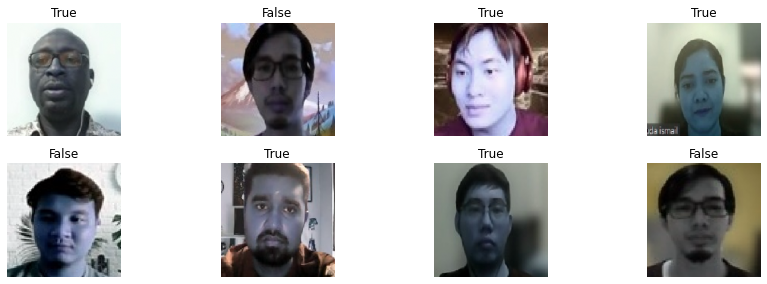

In [200]:
names = dict(zip(classLabels, classNames))

a,b = 3,4
count = 1
plt.figure(figsize=(12,6))

for i in range(len(testImages)):
    predictedLabel = np.argmax(predictions[i])
    print(predictedLabel, testLabels[i], predictedLabel == testLabels[i])
    
    plt.subplot(a,b,count)
    plt.imshow(testImages[i])
    plt.axis('off') 
    plt.title(predictedLabel == testLabels[i])
    count+=1
    
print(names)
plt.tight_layout()
plt.show()